In [50]:
import numpy as np
from os import listdir
from os.path import isfile, join
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt

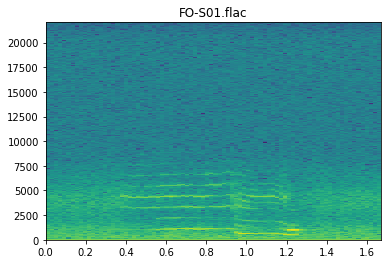

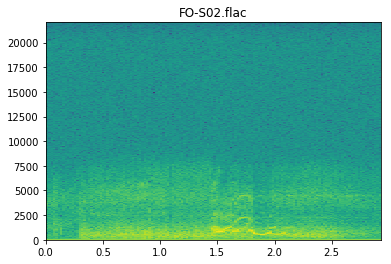

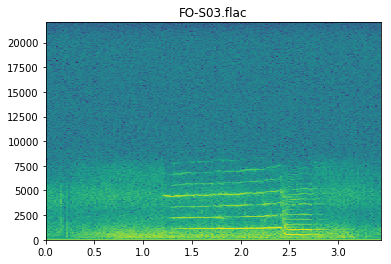

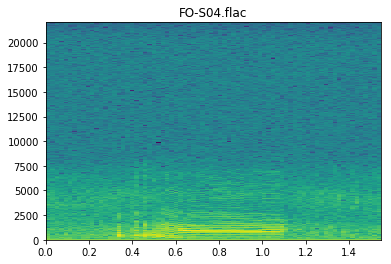

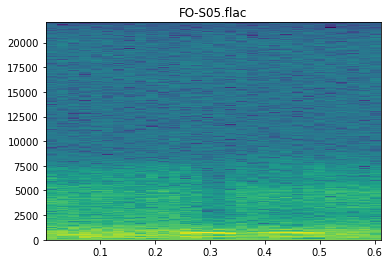

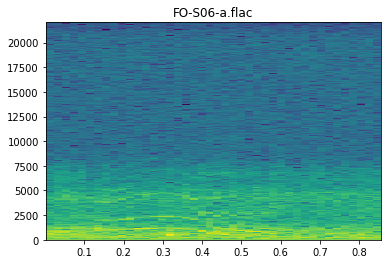

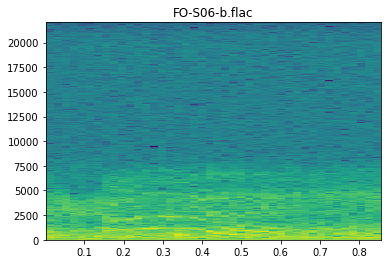

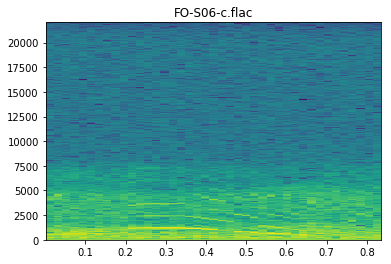

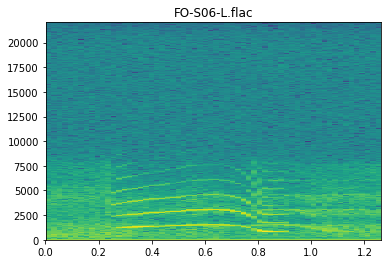

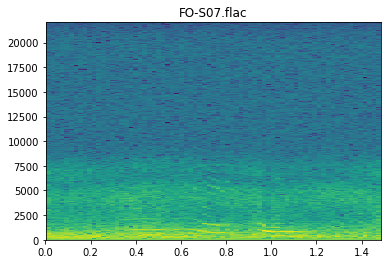

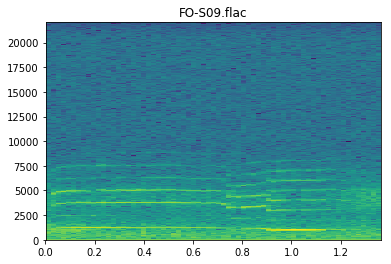

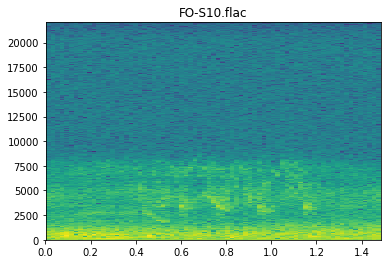

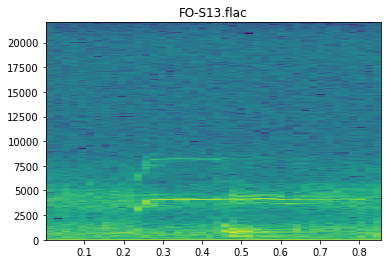

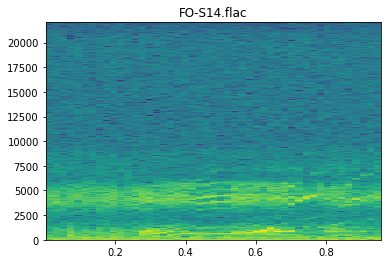

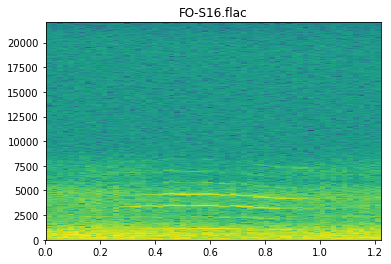

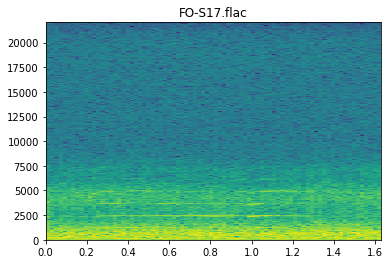

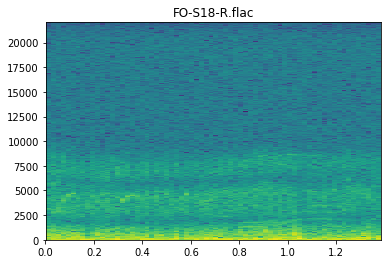

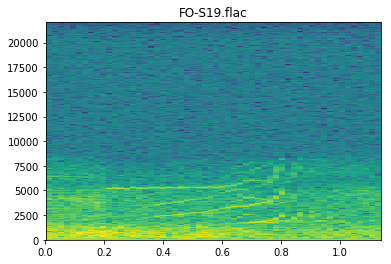

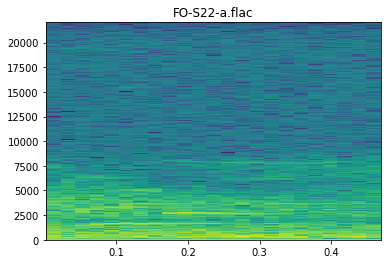

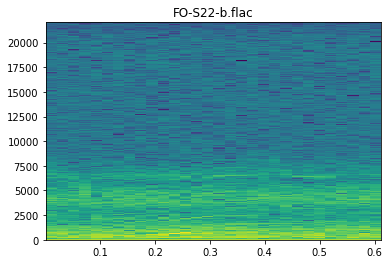

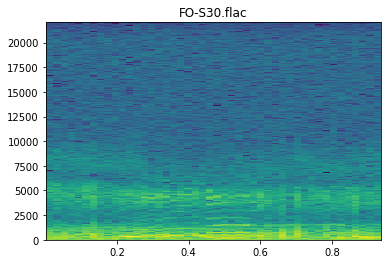

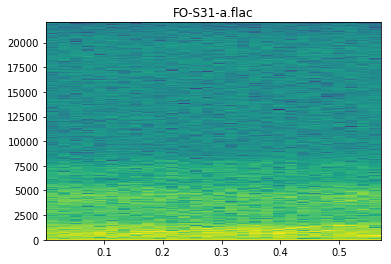

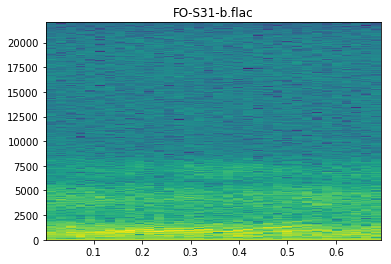

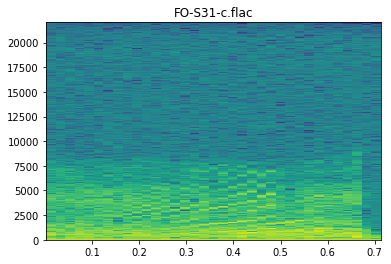

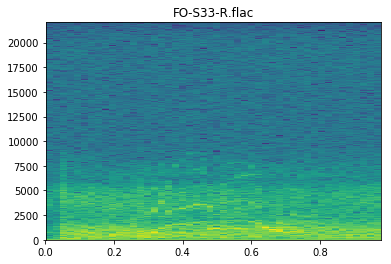

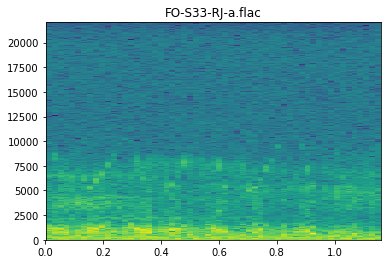

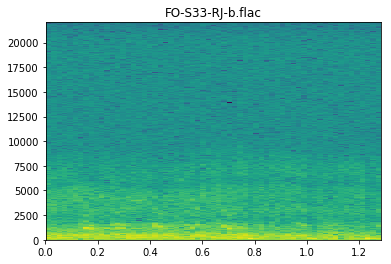

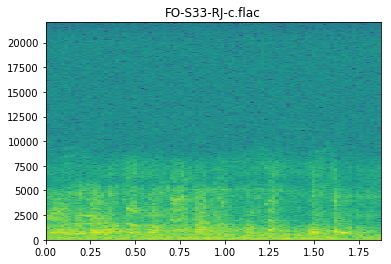

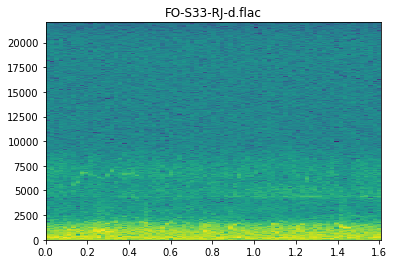

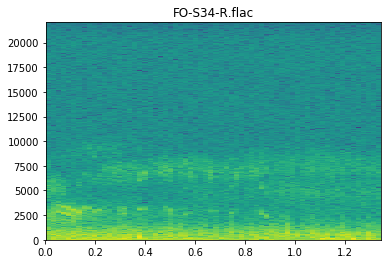

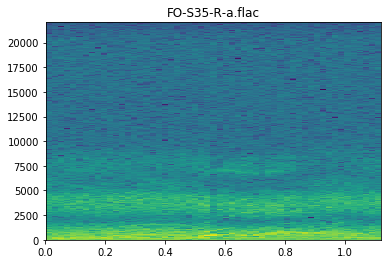

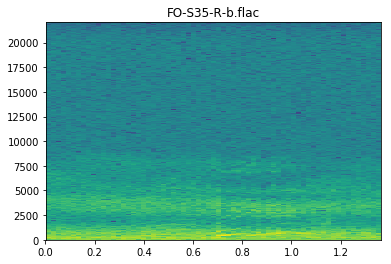

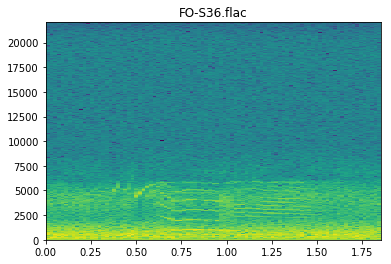

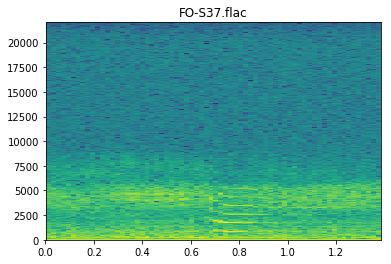

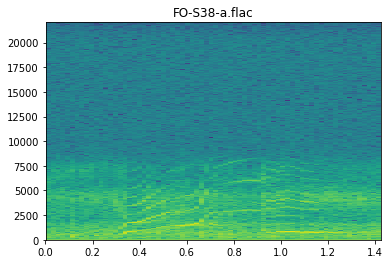

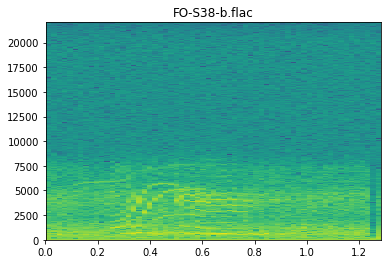

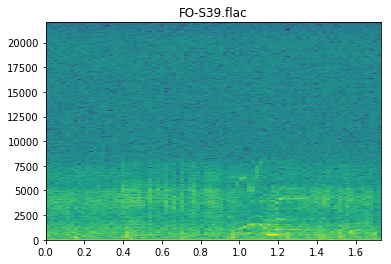

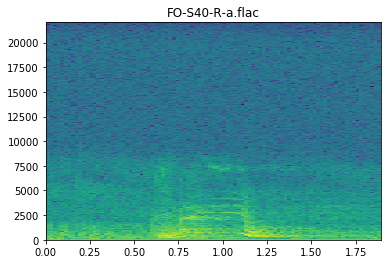

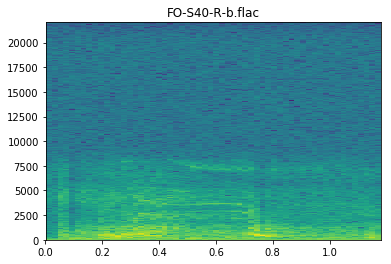

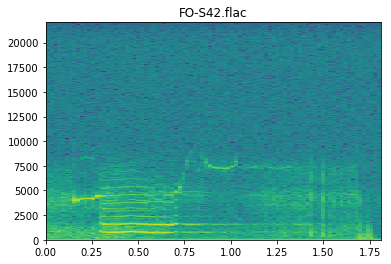

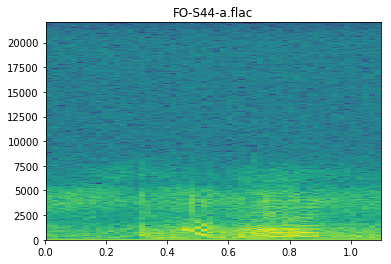

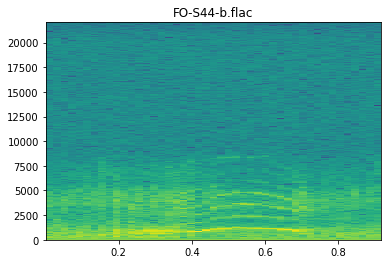

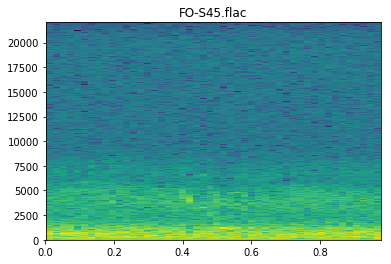

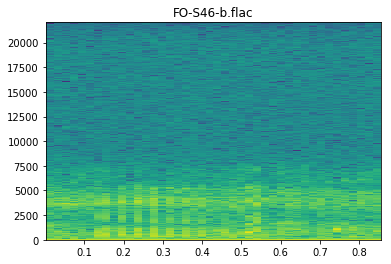

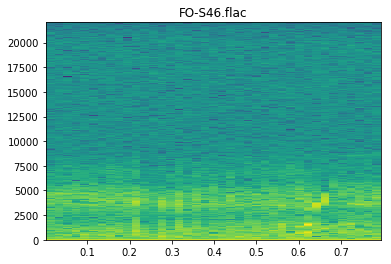

In [59]:

folderpath = r"C:\Users\Jennifer Rogers\Downloads\FlacFiles"
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]
for file in onlyfiles:
    data, samplerate = sf.read(join(folderpath, file))
    f, t, spec = signal.spectrogram(data, samplerate)
    plt.specgram(data, Fs=samplerate, NFFT=1024)
    plt.title(file)
    plt.show()